# Data exploration

In this notebook we take some metrics from our data in order to better understand it and develop models that fit the problem.

In [1]:
import pandas as pd

color_data = pd.read_csv("color_dataset.csv")

color_data.head()

,red_0,green_0,blue_0,red_1,green_1,blue_1,red_2,green_2,blue_2,red_3,green_3,blue_3,red_4,green_4,blue_4,red_5,green_5,blue_5,label
0,127,81,68,48,32,30,226,207,195,216,140,109,175,140,128,175,162,170,Positive
1,58,70,73,71,113,168,127,108,76,176,172,167,136,134,118,155,172,193,Positive
2,188,217,246,32,26,24,130,159,206,102,119,157,96,88,95,80,89,106,Negative
3,204,192,177,29,40,52,155,115,68,111,74,32,117,135,145,161,128,100,Positive
4,30,24,27,172,136,124,114,78,77,133,145,150,81,86,99,119,128,142,Highly negative


In [2]:
color_data.shape

(12350, 19)

In [3]:
color_data["label"].value_counts()

label
Positive           7779
Neutral            2021
Negative           1911
Highly positive     389
Highly negative     250
Name: count, dtype: int64

In this case, there's an implicit order between labels (they go from ```Highly negative``` to ```Highly positive```), so we can use numerical values ranging from 0 to the number of classes, for this particular dataset that would be from 0 to 5 excluding 5. This is going to be helpful for training neural nets.

In [4]:
label2number = {"Highly negative":0.0, "Negative":1.0, "Neutral":2.0, "Positive":3.0, "Highly positive": 4.0}
number2label = {0.0: "Highly negative", 1.0:"Negative", 2.0: "Neutral", 3.0:"Positive", 4.0:"Highly positive"}

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

clf_rf = RandomForestClassifier(max_depth = 10,random_state = 0)

X = color_data.loc[:, color_data.columns != 'label']
y = color_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Metricas para Random Forest \n", classification_report(y_test, y_pred_rf))

Metricas para Random Forest 
                  precision    recall  f1-score   support

Highly negative       0.00      0.00      0.00        69
Highly positive       0.00      0.00      0.00       125
       Negative       0.50      0.03      0.05       567
        Neutral       0.00      0.00      0.00       609
       Positive       0.63      1.00      0.77      2335

       accuracy                           0.63      3705
      macro avg       0.23      0.20      0.16      3705
   weighted avg       0.48      0.63      0.50      3705



c:\Users\usuario\Desktop\Personal projects\ML-Projects\Image sentiment analisis\image-sentiment-analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuario\Desktop\Personal projects\ML-Projects\Image sentiment analisis\image-sentiment-analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuario\Desktop\Personal projects\ML-Projects\Image sentiment analisis\image-sentiment-analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarnin

In the code under this paragraph the first decision tree from the random forest is plotted, this way you can interpret the decisions made by the classifier until the second depth level of this tree.

El primer arbol de decision dentro del random forest tiene 539 nodos


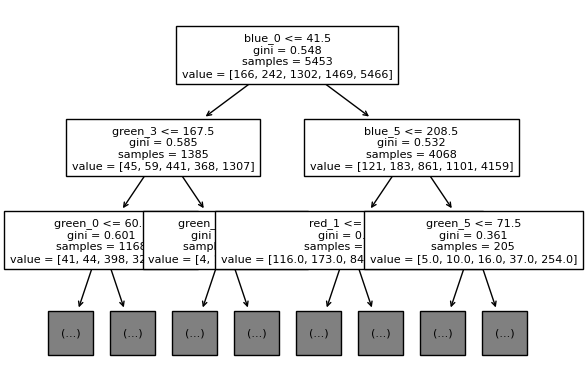

In [14]:
from sklearn import tree
nodes_first_count = clf_rf.estimators_[0].tree_.node_count
tree.plot_tree(clf_rf.estimators_[0], max_depth = 2, fontsize = 8, feature_names = list(X.columns.values))
print(f"El primer arbol de decision dentro del random forest tiene {nodes_first_count} nodos")

Now the model can be tested with images outside of the model, for that use the function ``img_to_colors`` in ``utils.py``.

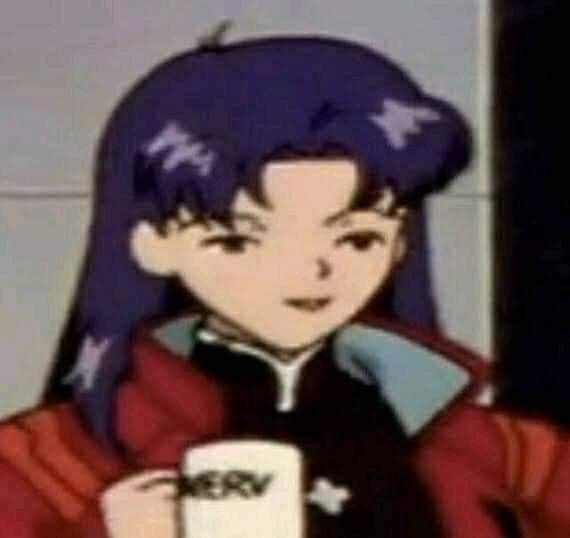

['Positive']


c:\Users\usuario\Desktop\Personal projects\ML-Projects\Image sentiment analisis\image-sentiment-analysis\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
from utils import img_to_colors
from IPython.display import Image, display
import pathlib
#change the name of the image as needed
img = "dummy_images\\name_of_image.jpg"
actual_folder = f"{str(pathlib.Path().absolute())}\\"
pal = img_to_colors(f"{actual_folder}{img}", 6)
display(Image(filename= f"{actual_folder}{img}"))
print(clf_rf.predict([pal]))

This result was expected, since there aren't many elements under the ```Highly positive``` and ```Highly negative``` labels. After this there are some alternatives to try: 

- Reduce the number of classes to ```Positive```, ```Negative``` and ```Neutral```.
- Try with other classifiers first.
- Do some data augmentation on the images first, then classify again.

Or drop the hypothesis that the colors can classify emotions accurately altogether.

First, let's try to use other classifiers in order to explore other alternatives before dropping the idea that the color palette is enough.